In [1]:
### Imports from algo_common

import csv
import collections
import datetime
from dateutil import tz
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
import os
import pandas as pd
import pytz
import sys
import time

os.chdir(r'D:\algo2\IBridgePy_Win_Anaconda38_64 - Copy')
sys.path.append(os.path.join(os.getcwd(), '..'))

from trader_factory import build_active_IBridgePy_plus
from IBridgePy.IbridgepyTools import symbol

from Utils import Algos
from Utils import EnterExits
from Utils import IndicatorCalculations
from Utils import Orders
from Utils import Plotters
from Utils import Utils
from UnitTests import testutils


In [50]:
sim = build_active_IBridgePy_plus('DU2628075') # Build an active trader to get connected to Interactive Brokers 

Try brokerClient IBinsync port=7496
port=7496 is correct and set port to userConfig.brokerClientConfig.IB_CLIENT
Connected to IB is successful using port=7496
##    ACCOUNT Balance  DU2628075  ##
CASH=359449.41
portfolio_value=299539.37
positions_value=60016.49
##    POSITIONS DU2628075   ##
Symbol Amount Cost_basis
STK,,,SPY,USD -153 392.78534615
##    NO any order    ##


In [2]:
## Load and clean data
logName = r"D:\algo2\IBridgePy_Win_Anaconda38_64 - Copy\Output\candlestick_2022-12-07\Daily_Log_2022-12-07.csv"
priceName = r"D:\algo2\IBridgePy_Win_Anaconda38_64 - Copy\Output\candlestick_2022-12-07\Daily_Price_Data_2022-12-07.csv"

priceColumns = ["date", "time", "open", "high", "low", "close", "volume"]
priceData = pd.read_csv(priceName, header=1, names=priceColumns)

logColumns = ["time", "fast", "fast1", "slow", "tLine", "macd", "signalLine", "longBool", "shortBool", "longFlag", "shortFlag", 
"enterFlag", "entryFlag", "exitFlag", "askPrice", "bidPrice", "lastPrice", "midPrice", "portfolioValue", "positionValue", "cash"]
logData = pd.read_csv(logName, header=1, names=logColumns)
logData = Utils.cleanLogData(logData)
logData['date'] = np.array([datetime.datetime.fromtimestamp(float(f)) for f in logData.time.values])

C:\Users\Lane Capital\anaconda3_rev1\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


[(0.0, 25.0)]

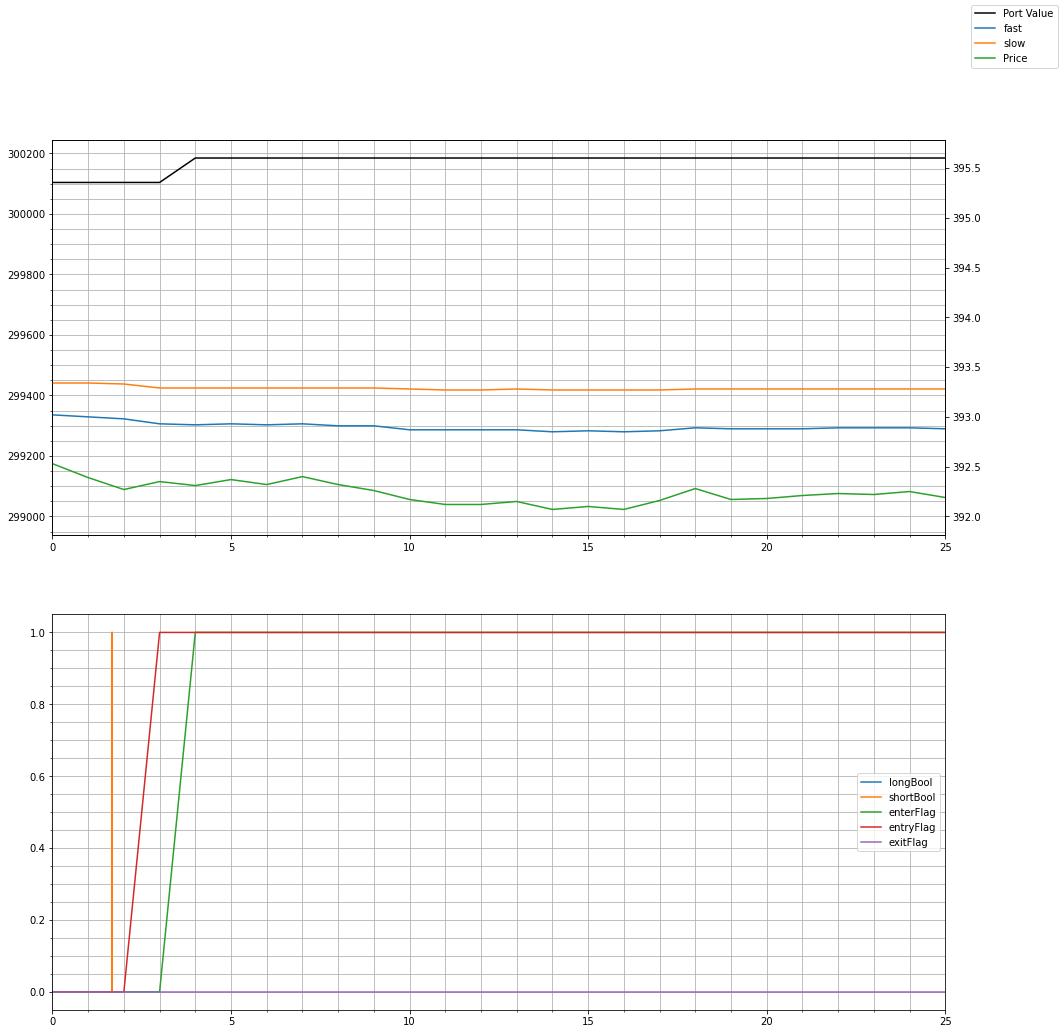

In [49]:
fig, (ax, ax1) = plt.subplots(2, figsize = (16,16))

ax.plot(logData.portfolioValue,color="black")
ax2=ax.twinx()
ax2.plot(logData.fast)
ax2.plot(logData.slow)
ax2.plot(logData.midPrice)
fig.legend(["Port Value","fast","slow","Price"])
ax.grid(which="both")
ax.minorticks_on()

ax1.plot(logData.time/1E9, logData.longBool)
ax1.plot(logData.time/1E9, logData.shortBool)
# ax1.plot(logData.time/1E9, logData.longFlag)
# ax1.plot(logData.time/1E9, logData.shortFlag)
ax1.plot(logData.enterFlag)
ax1.plot(logData.entryFlag)
ax1.plot(logData.exitFlag)
ax1.legend(["longBool","shortBool","enterFlag","entryFlag","exitFlag"])

ax1.grid(which="both")
ax1.minorticks_on()


ax1.set(xlim=(0,25))
ax.set(xlim=(0,25))

In [11]:
logData.columns

Index(['time', 'fast', 'fast1', 'slow', 'tLine', 'macd', 'signalLine',
       'longBool', 'shortBool', 'longFlag', 'shortFlag', 'enterFlag',
       'entryFlag', 'exitFlag', 'askPrice', 'bidPrice', 'lastPrice',
       'midPrice', 'portfolioValue', 'positionValue', 'cash', 'date'],
      dtype='object')

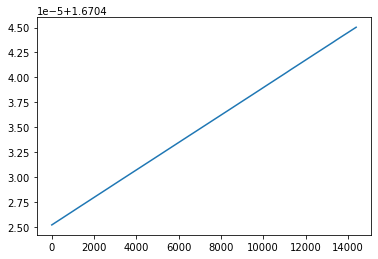

In [39]:
plt.plot(logData.time/1E9)

In [43]:
(logData.time/1E9).values[-20:]

array([1.670445  , 1.670445  , 1.67044501, 1.67044501, 1.67044501,
       1.67044501, 1.67044501, 1.67044501, 1.67044502, 1.67044502,
       1.67044502, 1.67044502, 1.67044502, 1.67044502, 1.67044502,
       1.67044503, 1.67044503, 1.67044503, 1.67044503, 1.67044503])

In [51]:
context.portfolio.positions


NameError: name 'context' is not defined